In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import datetime as dt
from scipy import signal
from scipy import stats

from matplotlib import ticker
%matplotlib notebook

# Testing
### 1. Testing capacity

In [2]:
df = pd.read_csv('overview_2021-10-07_testing_capacity.csv', delimiter=',')
# df.shape
# df.columns
# df.dtypes
# df.head(5)
# df.tail(5)

In [3]:
#  sorting out date 
#  convert the date (object) to the datetime type
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df.sort_values(by = 'date', ascending = True, inplace = True)
# df
# df.dtypes

In [4]:
# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)

<ipython-input-102-dc0a905f66cd>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (width, height))


<IPython.core.display.Javascript object>


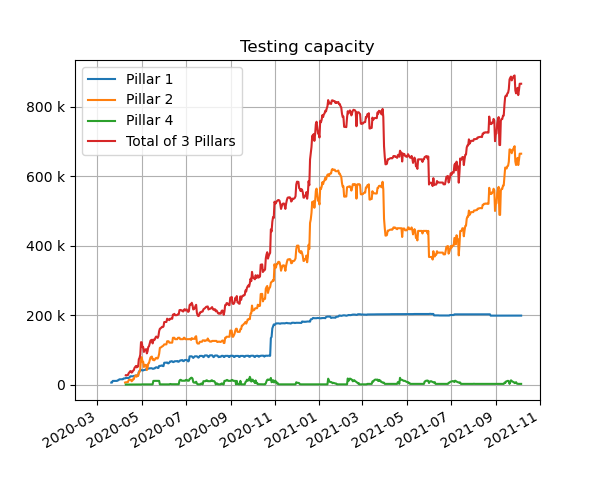

In [102]:
# plotting testing capacity
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df['date'],df['capacityPillarOne'], linestyle = 'solid', label = "Pillar 1")
plt.plot(df['date'],df['capacityPillarTwo'], linestyle = 'solid', label = "Pillar 2")
plt.plot(df['date'],df['capacityPillarFour'], linestyle = 'solid', label = "Pillar 4")
plt.plot(df['date'],df['capacityPillarOneTwo']+df['capacityPillarFour'], linestyle = 'solid', label = "Total of 3 Pillars")
plt.gcf().autofmt_xdate()
plt.grid()
plt.title("Testing capacity")
plt.gca().set_xbound(date_start, date_end)
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.legend()
plt.show()
# plt.savefig('Testing capacity.png', dpi=300, bbox_inches='tight')

### Notes: 
* Pillar 1: NHS and UKHSA Testing
    * Virus testing in UK Health Security Agency (UKHSA) labs and NHS hospitals for those with a clinical need, and health and care workers

* Pillar 2: UK Government testing programme
    * Virus testing for the wider population; using Lighthouse laboratories and partnership with public, private and academic sector laboratories
    * lab based testing and rapid lateral flow testing
* Pillar 3: Antibody testing (not included in the plot)
* Pillar 4: Surveillance testing
    * Virus testing and antibody serology testing for national surveillance (learn more about the prevalence and spread of the virus and for other testing research purposes)
    * capacity is procured for this Pillar based on the number of participants
  
Testing capacity data are available for the UK only so data cannot be presented separately for the four nations.


### 2. Testing conducted

In [5]:
df_testing_conducted = pd.read_csv('data_2021-Oct-07_testing_conducted.csv',delimiter = ',')
# df_testing_conducted.shape
# df_testing_conducted.head(5)
# df_testing_conducted.tail(5)
# df_testing_conducted.columns

In [6]:
# change date type
df_testing_conducted['date'] = pd.to_datetime(df_testing_conducted['date'], dayfirst = True)
df_testing_conducted.sort_values(by = 'date', ascending = True, inplace= True)
# df_testing_conducted.dtypes

<IPython.core.display.Javascript object>


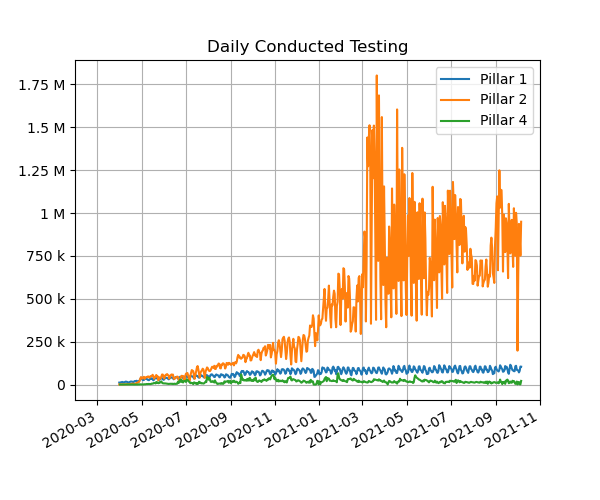

In [8]:
# plotting conducted testing on each day
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarOneTestsByPublishDate'], linestyle = 'solid', label = "Pillar 1")
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarTwoTestsByPublishDate'], linestyle = 'solid', label = "Pillar 2")
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarFourTestsByPublishDate'], linestyle = 'solid', label = "Pillar 4")

plt.gcf().autofmt_xdate()
plt.grid()

plt.title("Daily Conducted Testing")

# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)

plt.gca().set_xbound(date_start, date_end)

axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())

plt.legend()
plt.show()
# plt.savefig('Daily Conducted Testing.png', dpi=300, bbox_inches='tight')

# Cases
* Number of people with a positive COVID-19 virus test (either lab-reported or rapid lateral flow test) on reporting date. 

In [7]:
# load the testing data 
df_cases = pd.read_csv('data_2021-Oct-07_cases.csv', delimiter=',')
# df_cases.shape
# df_cases.head(5)

In [8]:
#  sorting out date 
df_cases['date'] = pd.to_datetime(df_cases['date'], dayfirst = True)
df_cases.sort_values(by = 'date', ascending = True, inplace = True)
# df_cases.head(5)

<IPython.core.display.Javascript object>


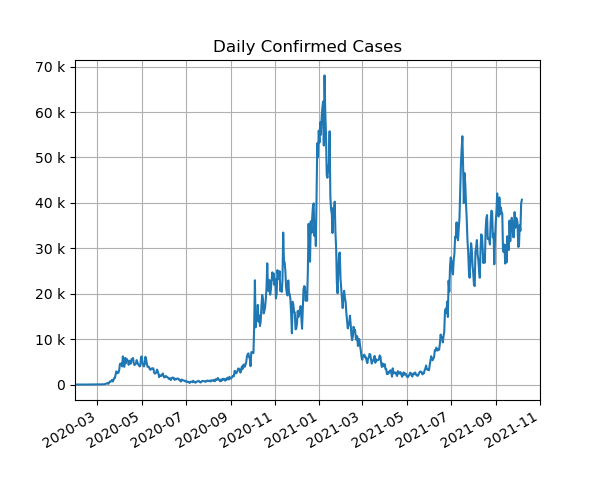

In [11]:
# plotting daily confirmed cases 
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df_cases['date'],df_cases['newCasesByPublishDate'], linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.grid()

plt.title("Daily Confirmed Cases")

# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)


axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.gca().set_xbound(date_start, date_end)
plt.show()
# plt.savefig('Daily Confirmed Cases.png', dpi=300, bbox_inches='tight')

# Death

In [9]:
df_death = pd.read_csv('data_2021-Oct-07_death.csv', delimiter = ',')
# df_death.shape
# df_death.columns
# df_death.head(5)
# df_death.tail(5)

In [10]:
df_death['date']= pd.to_datetime(df_death['date'],dayfirst = True)
df_death.sort_values(by = 'date',ascending = True,inplace = True)

<IPython.core.display.Javascript object>


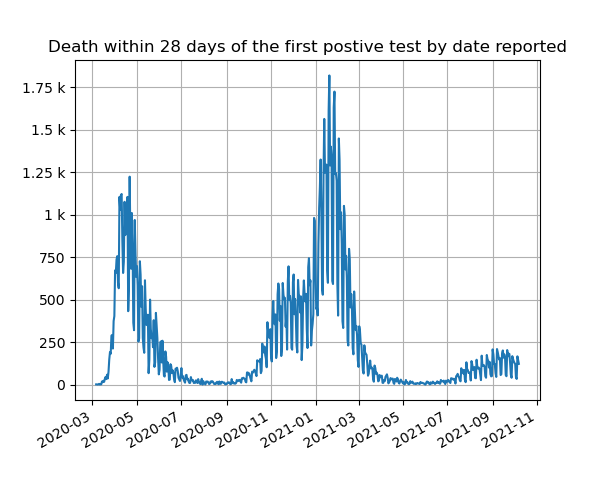

In [14]:
width = 6
height = 5
plt.figure(figsize = (width,height))
plt.plot(df_death['date'], df_death['newDeaths28DaysByPublishDate'],linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.grid()
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Death within 28 days of the first postive test by date reported')
plt.show()
# plt.savefig('Death.png', dpi=300, bbox_inches='tight')

# Vaccinations
* Data is from 10/01/2021 - 06/10/2021
* Number of people who have received a COVID-19 vaccination, by day on which the vaccine was reported.
* The vaccination programme began on 8 December 2020 with people receiving the vaccine developed by Pfizer/BioNTech; Oxford University/AstraZeneca vaccine from 4 January 2021, and the Moderna vaccine from 7 April 2021. 

In [11]:
df1 = pd.read_csv('data_2021-Oct-07_vaccination_first_dose.csv', delimiter = ',')
# df1.shape
# df1.columns
# df2.head(5)

In [12]:
df2 = pd.read_csv('data_2021-Oct-07_vaccination_second_dose.csv',delimiter = ',')
# df2.shape
# df2.columns

In [13]:
#  merge two CSV based on date
# df1.merge(df2,on='date')

In [14]:
#  sorting out date 
df1['date'] = pd.to_datetime(df1['date'], dayfirst = True)
df1.sort_values(by = 'date', ascending = True, inplace = True)
df2['date'] = pd.to_datetime(df2['date'], dayfirst = True)
df2.sort_values(by = 'date', ascending = True, inplace = True)

<IPython.core.display.Javascript object>


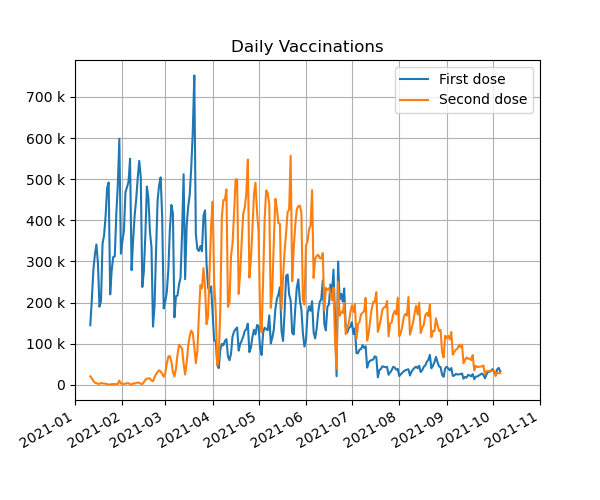

In [19]:
# plotting vaccination data
plt.figure(figsize = (width, height))
plt.plot(df1['date'],df1['newPeopleVaccinatedFirstDoseByPublishDate'], linestyle = 'solid', label = "First dose")
plt.plot(df2['date'],df2['newPeopleVaccinatedSecondDoseByPublishDate'], linestyle = 'solid', label = "Second dose")
plt.gcf().autofmt_xdate()
plt.grid()
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.gca().set_xbound(dt.date(2021,1,1), dt.date(2021,11,1))
plt.title("Daily Vaccinations")
plt.legend()
plt.show()
# plt.savefig('Daily Vaccinations.png', dpi=300, bbox_inches='tight')

## NHS covid-19 app download
* The NHS COVID-19 app is part of the NHS Test and Trace service in England and NHS Wales Test, Trace, Protect. It is an important tool to help break the chains of transmission of coronavirus
* The app has a number of tools, including contact tracing, information on local area restrictions and venue check-in. It uses proven technology from Apple and Google, designed to protect every user’s privacy.
* statistics related to  NHS covid-19 app
    * app download (contry level with both England and Wales combined)
    * venue chick-ins using NHS QR code posters (contry level with both England and Wales combined)
    * venue alert sent out (contry level with both England and Wales combined)
        * If people with coronavirus (COVID-19) have been to a venue, people who also checked into that venue on the same date using the app may get an alert.
    * Contact tracing alerts sent
    * Symptoms reported into the app
    * Test results linked to the app
    * etc 
* The NHS COVID-19 app launched an ‘early adopters’ trial from 13 August 2020. Data on the number of app downloads, and the number of NHS QR code posters created, starts from this date.
* The app launched nationally in England and Wales on 24 September 2020. Most of the published data starts from this date.

### 1. app download

In [15]:
df_app = pd.read_csv('covid19_app_country_agnostic_dataset.csv')
# df_app.columns
df_app.head(13)
# df_app.dtypes

,Week starting (Wythnos yn dechrau),Week ending (Wythnos yn gorffen),Number of app downloads (Nifer o lawrlwythiadau ap),Number of venues the app has sent alerts about (Nifer o leoliadau mae’r ap wedi anfon hysbysiadau amdanynt),Number of NHS QR posters created (Nifer o bosteri cod QR y GIG a grëwyd),Cumulative number of app downloads (Nifer o lawrlwythiadau ap cronnus),Cumulative number of 'at risk' venues triggering venue alerts (Nifer o leoliadau 'dan risg' cronnus),Cumulative number of NHS QR posters created (Nifer o bosteri cod QR y GIG a grëwyd cronnus)
0,13/08/2020,19/08/2020,53238,0,401,53238,0,401
1,20/08/2020,26/08/2020,54248,0,521,107486,0,922
2,27/08/2020,02/09/2020,42643,0,408,150129,0,1330
3,03/09/2020,09/09/2020,35676,0,335,185805,0,1665
4,10/09/2020,16/09/2020,110262,0,24936,296067,0,26601
5,17/09/2020,23/09/2020,695109,0,200115,991176,0,226716
6,24/09/2020,30/09/2020,13460942,0,344921,14452118,0,571637
7,01/10/2020,07/10/2020,2072172,0,71543,16524290,0,643180
8,08/10/2020,14/10/2020,1169360,0,41269,17693650,0,684449
9,15/10/2020,21/10/2020,970084,0,28532,18663734,0,712981


In [16]:
#  sorting out date 
df_app['Week starting (Wythnos yn dechrau)'] = pd.to_datetime(df_app['Week starting (Wythnos yn dechrau)'], dayfirst = True)
df_app.sort_values(by = 'Week starting (Wythnos yn dechrau)', ascending = True, inplace = True)
df_app.head(12)

,Week starting (Wythnos yn dechrau),Week ending (Wythnos yn gorffen),Number of app downloads (Nifer o lawrlwythiadau ap),Number of venues the app has sent alerts about (Nifer o leoliadau mae’r ap wedi anfon hysbysiadau amdanynt),Number of NHS QR posters created (Nifer o bosteri cod QR y GIG a grëwyd),Cumulative number of app downloads (Nifer o lawrlwythiadau ap cronnus),Cumulative number of 'at risk' venues triggering venue alerts (Nifer o leoliadau 'dan risg' cronnus),Cumulative number of NHS QR posters created (Nifer o bosteri cod QR y GIG a grëwyd cronnus)
0,2020-08-13,19/08/2020,53238,0,401,53238,0,401
1,2020-08-20,26/08/2020,54248,0,521,107486,0,922
2,2020-08-27,02/09/2020,42643,0,408,150129,0,1330
3,2020-09-03,09/09/2020,35676,0,335,185805,0,1665
4,2020-09-10,16/09/2020,110262,0,24936,296067,0,26601
5,2020-09-17,23/09/2020,695109,0,200115,991176,0,226716
6,2020-09-24,30/09/2020,13460942,0,344921,14452118,0,571637
7,2020-10-01,07/10/2020,2072172,0,71543,16524290,0,643180
8,2020-10-08,14/10/2020,1169360,0,41269,17693650,0,684449
9,2020-10-15,21/10/2020,970084,0,28532,18663734,0,712981


### !!! if included the code below --> remove the data before 11/05

In [17]:
# df_app = df_app[df_app['Week starting (Wythnos yn dechrau)']>='2020-11-05']
# df_app

In [18]:
df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'].max()/1e6

13.460942

<IPython.core.display.Javascript object>


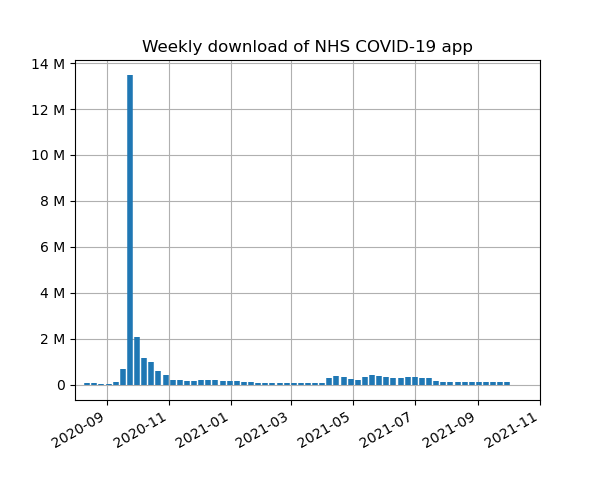

In [37]:
plt.figure(figsize = (6,5))

markerline, stemlines, baseline = plt.stem(df_app['Week starting (Wythnos yn dechrau)'], df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'], linefmt = '-', markerfmt=" ")
plt.setp(stemlines, 'linewidth', 4)
plt.setp(baseline, visible=False) # remove the red baseline
plt.gcf().autofmt_xdate()
plt.grid()
axes = plt.gca()
# plt.gca().set_xbound(dt.date(2020,8,1), dt.date(2021,11,1))
plt.gca().set_xbound(dt.date(2020,8,1), dt.date(2021,11,1))
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()
plt.title('Weekly download of NHS COVID-19 app')
# plt.ylim((0,1e6))
plt.savefig('Weekly download of NHS COVID-19 app.png', dpi=300, bbox_inches='tight')

### 2. tracing alerts sent out by the app

In [19]:
df_tracing = pd.read_csv('covid19_app_country_specific_dataset.csv')
df_tracing.head(10)
# df_tracing.columns
# df_tracing.head(5)

,Week starting (Wythnos yn dechrau),Week ending (Wythnos yn gorffen),Country (Wlad),Check-ins (Cofrestriadau),Symptoms reported (Symptomau a adroddwyd),Positive test results linked to app (Canlyniadau prawf positif),Negative test results linked to app (Canlyniadau prawf negatif),Contact tracing alert (Hysbysiadau olrhain cyswllt),Cumulative check-ins (Cofrestriadau cronnus),Cumulative symptoms reported (Symptomau a adroddwyd cronnus),Cumulative positive test results linked to app (Canlyniadau prawf positif cronnus),Cumulative negative test results linked to app (Canlyniadau prawf negatif cronnus),Cumulative contact tracing alert (Hysbysiadau olrhain cyswllt cronnus)
0,24/09/2020,30/09/2020,England / Lloegr,9260186,113332,9505,27814,3662,9260186,113332,9505,27814,3662
1,24/09/2020,30/09/2020,Wales / Cymru,247987,6870,386,4794,108,247987,6870,386,4794,108
2,01/10/2020,07/10/2020,England / Lloegr,11312733,89415,20686,88951,19182,20572919,202747,30191,116765,22844
3,01/10/2020,07/10/2020,Wales / Cymru,255741,4992,742,5158,535,503728,11862,1128,9952,643
4,08/10/2020,14/10/2020,England / Lloegr,13363452,85066,22657,93105,26882,33936371,287813,52848,209870,49726
5,08/10/2020,14/10/2020,Wales / Cymru,296788,4533,964,5164,815,800516,16395,2092,15116,1458
6,15/10/2020,21/10/2020,England / Lloegr,14602315,94489,37405,144380,32257,48538686,382302,90253,354250,81983
7,15/10/2020,21/10/2020,Wales / Cymru,338916,4740,1662,7273,991,1139432,21135,3754,22389,2449
8,22/10/2020,28/10/2020,England / Lloegr,14226215,73943,42643,138811,33081,62764901,456245,132896,493061,115064
9,22/10/2020,28/10/2020,Wales / Cymru,134350,4298,2401,7661,1139,1273782,25433,6155,30050,3588


In [20]:
#  sorting out date 
df_tracing['Week starting (Wythnos yn dechrau)'] = pd.to_datetime(df_tracing['Week starting (Wythnos yn dechrau)'], dayfirst = True)
df_tracing.sort_values(by = 'Week starting (Wythnos yn dechrau)', ascending = True, inplace = True)

In [21]:
# extract the tracing info as the sub data frame
# df_temp = df_tracing[['Week starting (Wythnos yn dechrau)','Country (Wlad)','Contact tracing alert (Hysbysiadau olrhain cyswllt)']]
# df_temp

In [22]:
# seperate England and Wales data into different data frames
df_England = df_tracing[df_tracing['Country (Wlad)'] == 'England / Lloegr'];
df_Wales = df_tracing[df_tracing['Country (Wlad)'] == 'Wales / Cymru'];

In [23]:
df_England['Contact tracing alert (Hysbysiadau olrhain cyswllt)'].to_numpy()

array([  3662,  19182,  26882,  32257,  33081, 122847, 127803,  85882,
        44570,  35687,  41141,  90658, 199056, 263821, 205623, 137240,
       103657,  71171,  52729,  35213,  33701,  26472,  14568,  10919,
        12853,  12430,  11234,   7185,   5565,   7505,   9979,   9296,
         9561,   9407,  16255,  47053, 111638, 150971, 219625, 357051,
       521412, 608732, 679439, 389075, 311450, 256007, 238129, 219447,
       196270, 199551, 133651, 119987, 134806, 117746])

In [24]:
df_Wales['Contact tracing alert (Hysbysiadau olrhain cyswllt)'].to_numpy()

array([  108,   535,   815,   991,  1139,  2074,  1497,  2195,  2674,
        3825,  6290,  9528,  8504,  8637,  4521,  3571,  2521,  1318,
         933,   740,   852,   571,   410,   270,   486,   555,   294,
         143,   157,    93,   178,   117,   229,   194,   227,   457,
        1605,  2472,  4803,  6965,  9946, 11434, 11226,  7720,  6258,
        5984,  9766, 10950, 11154, 12664,  9419,  9293, 11766,  7212])

In [25]:
df_tracing_combined = df_England['Contact tracing alert (Hysbysiadau olrhain cyswllt)'].to_numpy() + df_Wales['Contact tracing alert (Hysbysiadau olrhain cyswllt)'].to_numpy()

<IPython.core.display.Javascript object>


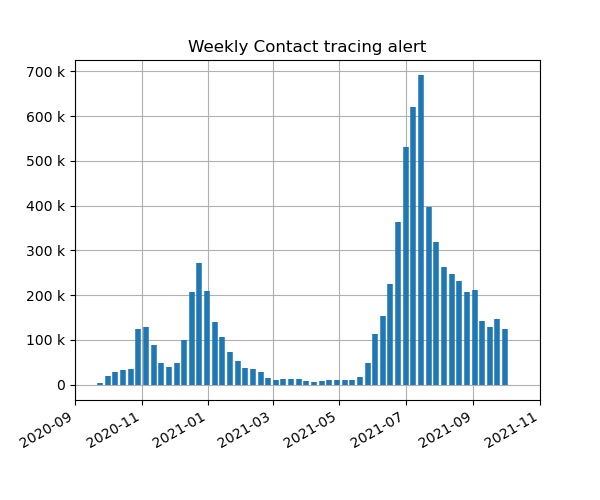

In [47]:
plt.figure(figsize = (6,5))
markerline, stemlines, baseline = plt.stem(df_England['Week starting (Wythnos yn dechrau)'],  df_tracing_combined , linefmt = '-', markerfmt=" ")
plt.setp(stemlines, 'linewidth', 4)
plt.setp(baseline, visible=False) # remove the red baseline

# markerline, stemlines, baseline = plt.stem(df_Wales['Week starting (Wythnos yn dechrau)'], df_Wales['Contact tracing alert (Hysbysiadau olrhain cyswllt)'], linefmt = '-', markerfmt=" ")
# plt.setp(stemlines, 'linewidth', 4, color='r')
# plt.setp(baseline, visible=False) # remove the red baseline

plt.gcf().autofmt_xdate()
plt.grid()
axes = plt.gca()
plt.gca().set_xbound(dt.date(2020,9,1), dt.date(2021,11,1))
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()
plt.title('Weekly Contact tracing alert')
# plt.ylim((0,2.2e6))
# plt.savefig('Covid 19 app weekly contact tracing alert', dpi=300, bbox_inches='tight')

## Analysis of time correlation

 ### 1. cases & death:
    1. Roadmap out of lockdown (From 8 March 2021, people in England will see restrictions start to lift and the government’s four-step roadmap offer a route back to a more normal life)

In [26]:
# df_cases[df_cases['date'] == '2021-03-08']
df_cases[df_cases['date'] == '2021-03-08'].index[0]

213

In [27]:
# select date before 2021-03-08 for analysis
df_death_part1 =  df_death.loc[df_death['date'] <= '2021-03-08']
death_arr = df_death_part1['newDeaths28DaysByPublishDate'].to_numpy() # conver the data series to the array
df_cases_part1 =  df_cases.loc[df_cases['date'] <= '2021-03-08']
cases_arr = df_cases_part1['newCasesByPublishDate'].to_numpy()
# cases_arr.size
# df_death_part1.tail(5)
# death_arr.size 

In [28]:
death_arr_pad0 = np.concatenate( (np.zeros(cases_arr.size - death_arr.size ),death_arr) )

<IPython.core.display.Javascript object>


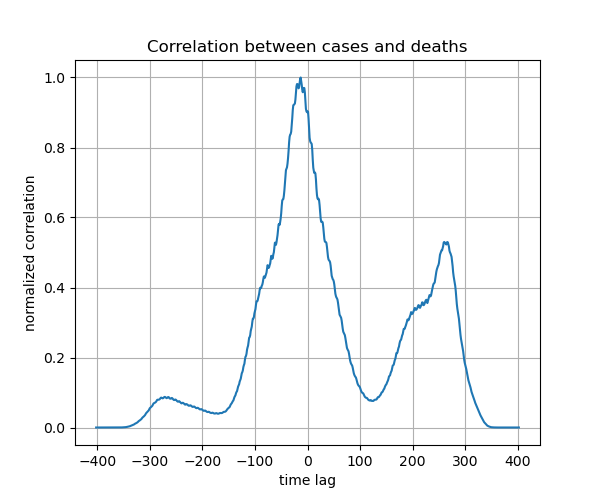

-13

In [51]:
corr = signal.correlate(cases_arr,death_arr_pad0, "full")
corr = corr/np.max(corr)
lags = signal.correlation_lags(cases_arr.size,death_arr_pad0.size, "full")
plt.figure(figsize = (6, 5))
plt.plot(lags,corr)
plt.show()
plt.xlabel ('time lag')
plt.ylabel('normalized correlation')
plt.title('Correlation between cases and deaths')
plt.grid()
lag = lags[np.argmax(corr)]
lag

<IPython.core.display.Javascript object>


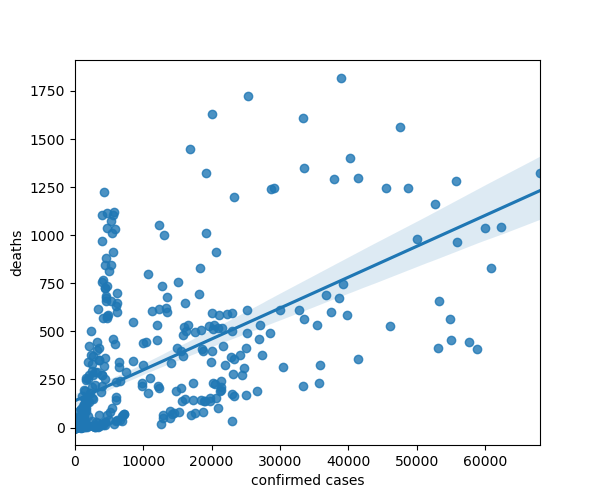

Text(0, 0.5, 'deaths')

In [52]:
# scatterplot of daily cases and deaths with a fitted linear regression line
plt.figure(figsize = (6,5))
sns.regplot(x = cases_arr, y = death_arr_pad0)
plt.show()
plt.xlabel("confirmed cases")
plt.ylabel('deaths')

In [53]:
pearson_coef, p_value = stats.pearsonr(cases_arr,death_arr_pad0)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

The Pearson Correlation coefficient is  0.591408031997405 and the P-value is  2.2235083813435293e-39


## interperation of this correlation
* the above plot might suggest that: before 8 March 2021, Covid-19 confirmed cases are leading death by around 13 days
* The linear relationship between confirmed cases and the death is moderately strong with the Pearson Correlation coefficient of 0.591408031997405 and the P-value of 2.2235083813435293e-39

In [29]:
# select date after 2021-03-08 for analysis
df_death_part2 =  df_death.loc[df_death['date'] > '2021-03-08']
death_arr = df_death_part2['newDeaths28DaysByPublishDate'].to_numpy() # conver the data series to the array
df_cases_part2 =  df_cases.loc[df_cases['date'] > '2021-03-08']
cases_arr = df_cases_part2['newCasesByPublishDate'].to_numpy()
# df_cases_part2.tail(5)

<IPython.core.display.Javascript object>


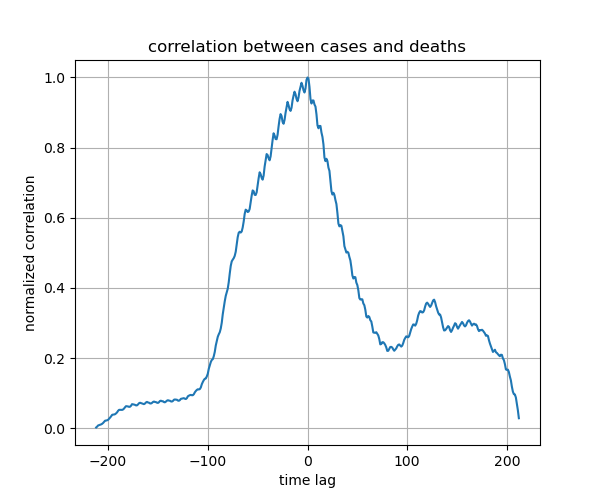

0

In [55]:
corr = signal.correlate(cases_arr,death_arr, "full")
corr = corr/np.max(corr)
lags = signal.correlation_lags(cases_arr.size,death_arr.size, "full")
plt.figure(figsize = (6, 5))
plt.plot(lags,corr)
plt.show()
plt.xlabel ('time lag')
plt.ylabel('normalized correlation')
plt.title('correlation between cases and deaths')
plt.grid()
lag = lags[np.argmax(corr)]
lag

<IPython.core.display.Javascript object>


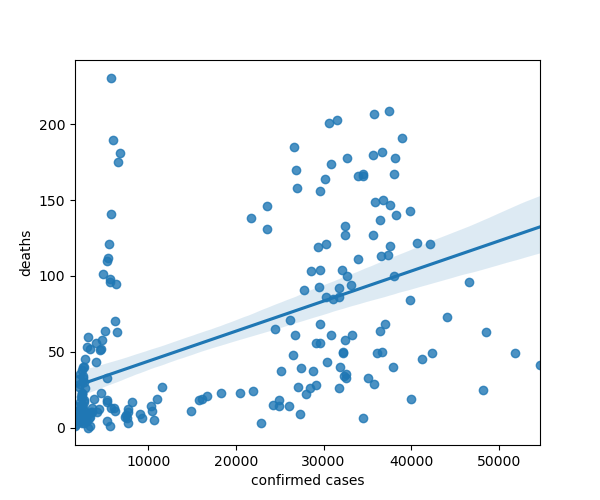

Text(0, 0.5, 'deaths')

In [56]:
plt.figure(figsize = (6,5))
sns.regplot(x = cases_arr, y = death_arr)
plt.show()
plt.xlabel("confirmed cases")
plt.ylabel('deaths')

In [58]:
pearson_coef, p_value = stats.pearsonr(cases_arr,death_arr)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

The Pearson Correlation coefficient is  0.5119143764782829 and the P-value is  1.2617429831738126e-15


## Interperation
* the death rate has been significantly reduced thanks to the roll out of vaccine; no time delay between cases and death
* The linear relationship between confirmed cases and the death is still moderately strong with the Pearson Correlation coefficient of 0.5119143764782829 and the P-value is  1.2617429831738126e-15 

### 2. Covid 19 app download and confirmed cases 

In [59]:
# df_cases.head(20)

In [31]:
#  summing up cases data over one week,so to be the same as the app download 
df_cases_weekly = df_cases.resample('W-Thu',on = 'date').newCasesByPublishDate.sum().reset_index()
df_cases_weekly.columns = ['date','weekly_new_cases']
# df_cases_weekly

In [32]:
#  select part of the df_cases_weekly date frame that match the date of app download
df_cases_weekly = df_cases_weekly[df_cases_weekly['date'].isin( df_app['Week starting (Wythnos yn dechrau)'])]
df_cases_weekly
# df_app['Week starting (Wythnos yn dechrau)']

,date,weekly_new_cases
27,2020-08-13,6717
28,2020-08-20,7354
29,2020-08-27,8088
30,2020-09-03,10043
31,2020-09-10,17727
32,2020-09-17,23478
33,2020-09-24,34749
34,2020-10-01,43818
35,2020-10-08,101639
36,2020-10-15,111812


<IPython.core.display.Javascript object>


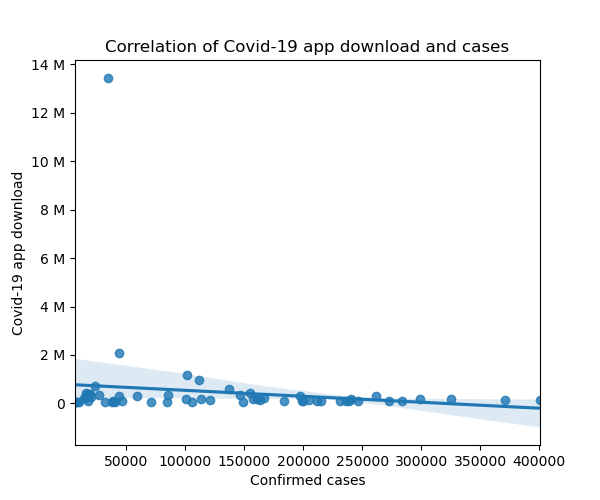

In [62]:
plt.figure(figsize = (6,5))
sns.regplot(x = df_cases_weekly.weekly_new_cases, y = df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel("Confirmed cases")
plt.ylabel('Covid-19 app download')
plt.title('Correlation of Covid-19 app download and cases')
plt.show()

In [63]:
pearson_coef, p_value = stats.pearsonr(df_cases_weekly.weekly_new_cases,df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

The Pearson Correlation coefficient is  -0.14735861897350433 and the P-value is  0.2611952316375271


### interperation: 
* For time frame between ____,  As the P value is highe than 0.1, there is no significant correlation between cases and app uptake 
* At the time frame of 2020/11/05 to 2021/9/30

### 3. Covid 19 app download and deaths

In [33]:
#  summing up cases data over one week,so to be the same as the app download 
df_deaths_weekly = df_death.resample('W-Thu',on = 'date').newDeaths28DaysByPublishDate.sum().reset_index()
df_deaths_weekly.columns = ['date','weekly_deaths']
df_deaths_weekly = df_deaths_weekly[df_deaths_weekly['date'].isin( df_app['Week starting (Wythnos yn dechrau)'])]

<IPython.core.display.Javascript object>


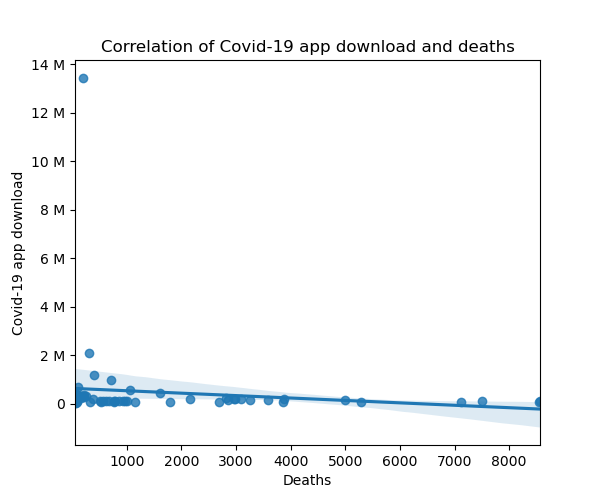

In [65]:
plt.figure(figsize = (6,5))
sns.regplot(x = df_deaths_weekly.weekly_deaths, y = df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('Deaths')
plt.ylabel('Covid-19 app download')
plt.title('Correlation of Covid-19 app download and deaths')
plt.show()

In [67]:
pearson_coef, p_value = stats.pearsonr(df_deaths_weekly.weekly_deaths,df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

The Pearson Correlation coefficient is  -0.12550114514556307 and the P-value is  0.3393437568967984


### inteperations
* at the time frame of ____, similar to cases above, no significant correlation between app uptake and deaths
* At the time frame of 2020/11/05 to 2021/9/30 xxxx

### 4. Covid 19 app download and vaccinations

In [34]:
df_vac_given = pd.read_csv('data_2021-Oct-07__vaccination_given.csv')
df_vac_given.tail(5) # newvaccines given on each day is only avilable from  11/01/2021; before this date, only cum value is available
# df_vac_given.dtypes

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
265,overview,United Kingdom,K02000001,14/01/2021,321951.0,3678180,316694.0,3234946,5257.0,443234
266,overview,United Kingdom,K02000001,13/01/2021,288688.0,3356229,278943.0,2918252,9745.0,437977
267,overview,United Kingdom,K02000001,12/01/2021,223726.0,3067541,207661.0,2639309,16065.0,428232
268,overview,United Kingdom,K02000001,11/01/2021,165844.0,2843815,145076.0,2431648,20768.0,412167
269,overview,United Kingdom,K02000001,10/01/2021,NaN,2677971,NaN,2286572,NaN,391399


In [35]:
df_vac_given['date'] = pd.to_datetime(df_vac_given['date'],dayfirst = True)
df_vac_given.sort_values(by = 'date', ascending = True, inplace = True)
# df_vac_given

In [36]:
df_vac_weekly = df_vac_given.resample('W-Thu',on = 'date').newVaccinesGivenByPublishDate.sum().reset_index()
df_vac_weekly.columns = ['date','weekly_vaccinations']
df_vac_weekly

,date,weekly_vaccinations
0,2021-01-14,1000209.0
1,2021-01-21,2171719.0
2,2021-01-28,2519539.0
3,2021-02-04,3107602.0
4,2021-02-11,3065278.0
5,2021-02-18,2922809.0
6,2021-02-25,2448465.0
7,2021-03-04,2479291.0
8,2021-03-11,2366720.0
9,2021-03-18,3515199.0


In [37]:
#  cross match the week 
df_app_confined = df_app[df_app['Week starting (Wythnos yn dechrau)'].isin( df_vac_weekly['date'])]
df_vac_weekly = df_vac_weekly[df_vac_weekly['date'].isin( df_app_confined['Week starting (Wythnos yn dechrau)'])]
df_vac_weekly

,date,weekly_vaccinations
0,2021-01-14,1000209.0
1,2021-01-21,2171719.0
2,2021-01-28,2519539.0
3,2021-02-04,3107602.0
4,2021-02-11,3065278.0
5,2021-02-18,2922809.0
6,2021-02-25,2448465.0
7,2021-03-04,2479291.0
8,2021-03-11,2366720.0
9,2021-03-18,3515199.0


<IPython.core.display.Javascript object>


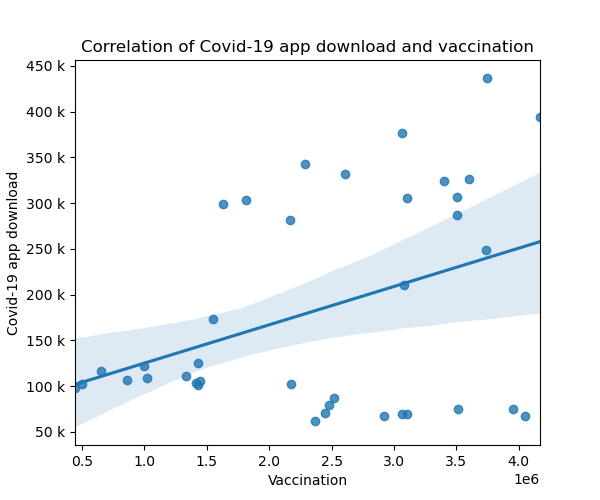

In [72]:
plt.figure(figsize = (6,5))
sns.regplot(x = df_vac_weekly.weekly_vaccinations, y = df_app_confined['Number of app downloads (Nifer o lawrlwythiadau ap)'])
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('Vaccination')
plt.ylabel('Covid-19 app download')
plt.title('Correlation of Covid-19 app download and vaccination')
plt.show()

In [74]:
pearson_coef, p_value = stats.pearsonr(df_vac_weekly.weekly_vaccinations,df_app_confined['Number of app downloads (Nifer o lawrlwythiadau ap)'])
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

The Pearson Correlation coefficient is  0.38991772584507045 and the P-value is  0.01552171829394403


### inteperation
* At the time frame of 2021/1/14 to 2021/9/30, the correlation between vaccination rate and the app download moderate (P value below 0.05); the linear relationship is slightly strong ( Pearson Correlation coefficient of 0.38991772584507045)

### 4. Covid 19 app download and testing

In [45]:
df_testing_conducted_all3pilars = df_testing_conducted[['date', 'newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate','newPillarFourTestsByPublishDate']]
# select last three columns
Total_3_pillars = df_testing_conducted_all3pilars.iloc[:,-3:].sum(axis = 1)  
#  add summed up values as a new column
df_testing_conducted_all3pilars  = df_testing_conducted_all3pilars.assign(Total_3_pillars = Total_3_pillars.values)
df_testing_conducted_all3pilars

,date,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarFourTestsByPublishDate,Total_3_pillars
554,2020-03-31,11267,629,NaN,11896.0
553,2020-04-01,11256,668,23.0,11947.0
552,2020-04-02,12854,603,166.0,13623.0
551,2020-04-03,13616,677,336.0,14629.0
550,2020-04-04,15103,796,181.0,16080.0
...,...,...,...,...,...
4,2021-10-02,81209,639662,14167.0,735038.0
3,2021-10-03,70791,936712,14567.0,1022070.0
2,2021-10-04,80038,860943,1520.0,942501.0
1,2021-10-05,105074,751342,1095.0,857511.0


In [46]:
df_testing_weekly = df_testing_conducted_all3pilars.resample('W-Thu',on = 'date').Total_3_pillars.sum().reset_index()
df_testing_weekly.columns = ['date','weekly_testing']
df_testing_weekly = df_testing_weekly[df_testing_weekly['date'].isin(df_app['Week starting (Wythnos yn dechrau)'])]
# df_testing_weekly

<IPython.core.display.Javascript object>


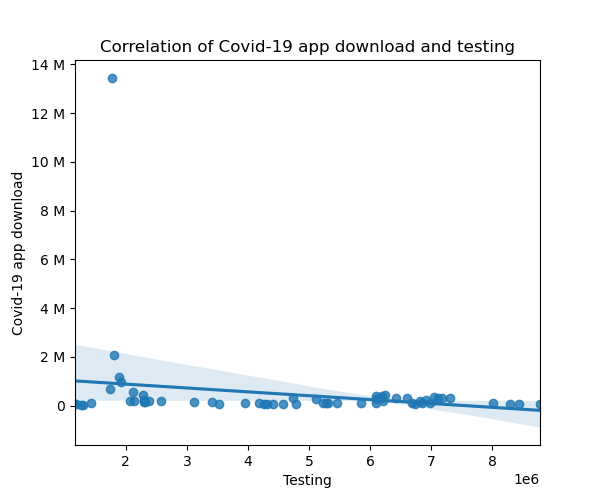

In [77]:
plt.figure(figsize = (6,5))
sns.regplot(x = df_testing_weekly.weekly_testing, y = df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('Testing')
plt.ylabel('Covid-19 app download')
plt.title('Correlation of Covid-19 app download and testing')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_testing_weekly.weekly_testing,df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'])
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

### inteperation
* At the time frame of 2020/11/05 to 2021/9/30, there is no significant correlation between testing and the app download as P-values is above 0.1

### normalized value to compare

In [40]:
#  simple scaling total testing, confirmed cases and death for each day
df_cases_nor = df_cases['newCasesByPublishDate']/np.max(df_cases['newCasesByPublishDate'])
df_death_nor = df_death['newDeaths28DaysByPublishDate']/np.max(df_death['newDeaths28DaysByPublishDate'])
df_testing_conducted_total = df_testing_conducted['newPillarOneTestsByPublishDate'] + df_testing_conducted['newPillarTwoTestsByPublishDate'] + df_testing_conducted['newPillarFourTestsByPublishDate'] 
df_testing_conducted_nor = df_testing_conducted_total/np.max(df_testing_conducted_total)
df_tracing_combined_nor = df_tracing_combined/np.max(df_tracing_combined)
df_download_nor = df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'] / df_app['Number of app downloads (Nifer o lawrlwythiadau ap)'].max()
df_vac_given_nor = df_vac_given.newVaccinesGivenByPublishDate /df_vac_given.newVaccinesGivenByPublishDate.max()


In [42]:
np.max(df_tracing_combined)


690665

In [82]:
#  min-max scaling  --> do not see much difference in terms of visualization when compared to simple scaling
# df_cases_nor = (df_cases['newCasesByPublishDate'] - df_cases['newCasesByPublishDate'].min())/(df_cases['newCasesByPublishDate'].max()- df_cases['newCasesByPublishDate'].min())
# df_death_nor = (df_death['newDeaths28DaysByPublishDate'] - df_death['newDeaths28DaysByPublishDate'].min())/(df_death['newDeaths28DaysByPublishDate'].max()- df_death['newDeaths28DaysByPublishDate'].min())

In [106]:
plt.figure(figsize = (6,5))
plt.plot(df_testing_conducted['date'],df_testing_conducted_nor,linestyle = 'solid',label = "Testing")
plt.plot(df_cases['date'],df_cases_nor,linestyle = 'solid', label = "Confirmed cases")
plt.plot(df_death['date'],df_death_nor,linestyle = 'solid',label = "Death")
plt.plot(df_England['Week starting (Wythnos yn dechrau)'],df_tracing_combined_nor,linestyle = 'solid',label = "Covid tracing alert")
plt.plot(df_vac_given['date'], df_vac_given_nor, linestyle = 'solid',label = "Vaccination")
plt.plot(df_app['Week starting (Wythnos yn dechrau)'], df_download_nor, linestyle = 'solid',label = "App download")
plt.gcf().autofmt_xdate()
plt.grid()
# axes = plt.gca()
plt.legend()
plt.ylabel('Normalized')
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'df_tracing_combined_nor' is not defined

## Correlation heatmap
1. in order to align the time frame, we look at the date between 2021/1/14 to 2021/9/30; as vaccination data has the shortest time line, we use it as the reference 

In [43]:
#  change the column names of the weekly download dataframe
#  create the copy by selecting few related columns
df_app_part = df_app[['Week starting (Wythnos yn dechrau)', 'Number of app downloads (Nifer o lawrlwythiadau ap)']]
df_app_part = df_app_part.rename(columns = {"Week starting (Wythnos yn dechrau)":"date","Number of app downloads (Nifer o lawrlwythiadau ap)":"weekly_Covid19_app_download"},)
df_app_part


,date,weekly_Covid19_app_download
0,2020-08-13,53238
1,2020-08-20,54248
2,2020-08-27,42643
3,2020-09-03,35676
4,2020-09-10,110262
5,2020-09-17,695109
6,2020-09-24,13460942
7,2020-10-01,2072172
8,2020-10-08,1169360
9,2020-10-15,970084


In [47]:
#  merge related data frame on "date"
result = pd.merge(df_testing_weekly, df_cases_weekly, on = 'date')
result = pd.merge(result, df_deaths_weekly, on = 'date')
result = pd.merge(result, df_vac_weekly, on = 'date')
result = pd.merge(result, df_app_part, on = 'date')
result

,date,weekly_testing,weekly_new_cases,weekly_deaths,weekly_vaccinations,weekly_Covid19_app_download
0,2021-01-14,4181783.0,370839,7507,1000209.0,122430
1,2021-01-21,3953057.0,283392,8565,2171719.0,102659
2,2021-01-28,4307449.0,200089,8546,2519539.0,87413
3,2021-02-04,4566704.0,148725,7124,3107602.0,69771
4,2021-02-11,4408641.0,106196,5279,3065278.0,69969
5,2021-02-18,3522206.0,84589,3858,2922809.0,66803
6,2021-02-25,4259722.0,71320,2684,2448465.0,70050
7,2021-03-04,4776582.0,46796,1783,2479291.0,78719
8,2021-03-11,8288702.0,40321,1143,2366720.0,62252
9,2021-03-18,8779445.0,39205,758,3515199.0,75420


In [56]:
corr = result.corr()
corr

,weekly_testing,weekly_new_cases,weekly_deaths,weekly_vaccinations,weekly_Covid19_app_download
weekly_testing,1.000000,-0.143494,-0.619654,0.057358,0.177400
weekly_new_cases,-0.143494,1.000000,0.377506,-0.833740,-0.396497
weekly_deaths,-0.619654,0.377506,1.000000,-0.087824,-0.464558
weekly_vaccinations,0.057358,-0.833740,-0.087824,1.000000,0.389918
weekly_Covid19_app_download,0.177400,-0.396497,-0.464558,0.389918,1.000000


<IPython.core.display.Javascript object>


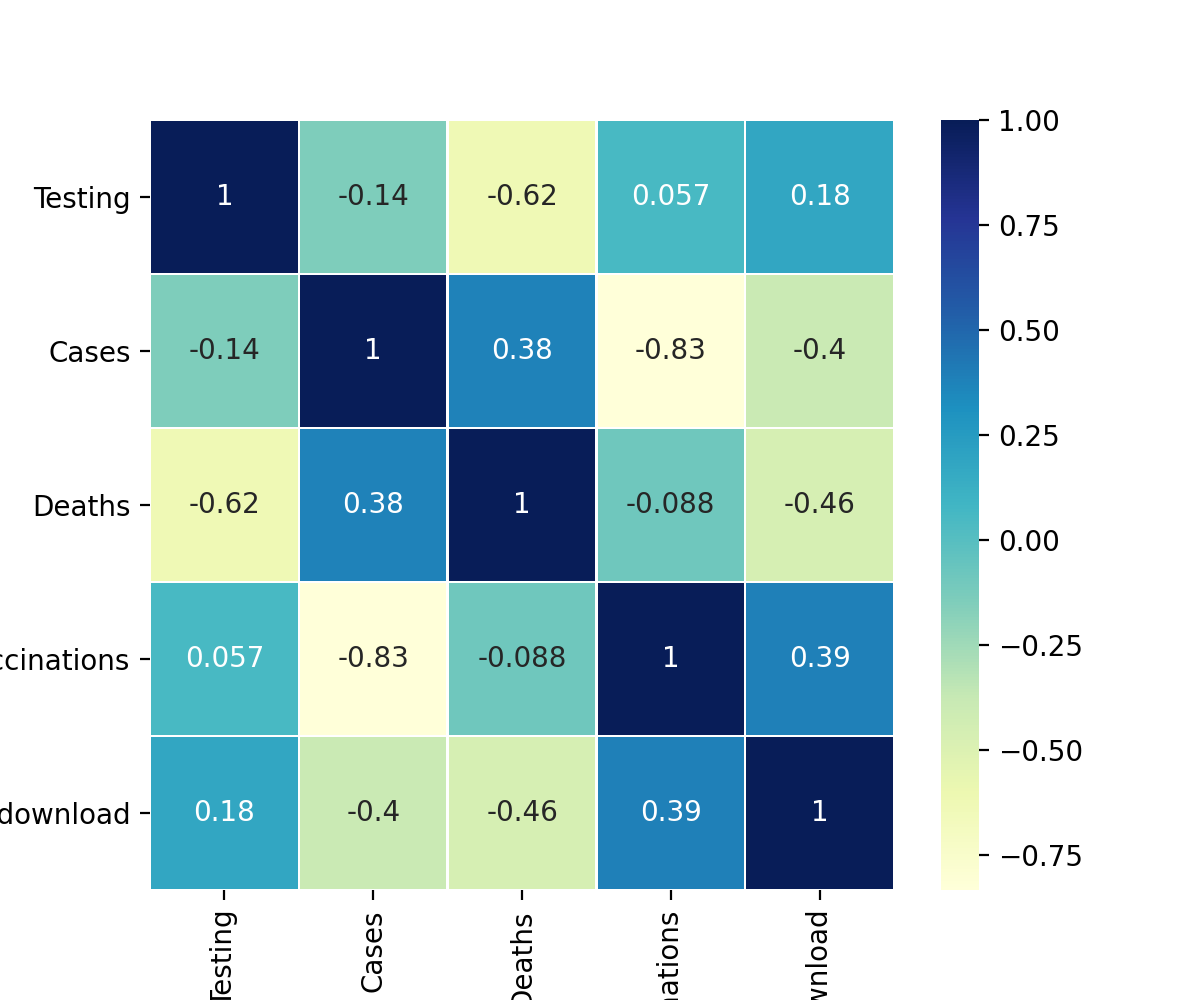

In [55]:
# plot the heatmap
# %matplotlib inline
corr_labels = ['Testing', 'Cases','Deaths','Vaccinations','COVID-19 app download']
plt.figure(figsize = (6,5))
sns.heatmap(corr, 
        xticklabels=corr_labels,
        yticklabels=corr_labels,
           annot= True,cmap="YlGnBu",linewidths=.5)
plt.show()
plt.savefig('heatmap', dpi=300, bbox_inches='tight')

### 1. download and vaccinations

<IPython.core.display.Javascript object>


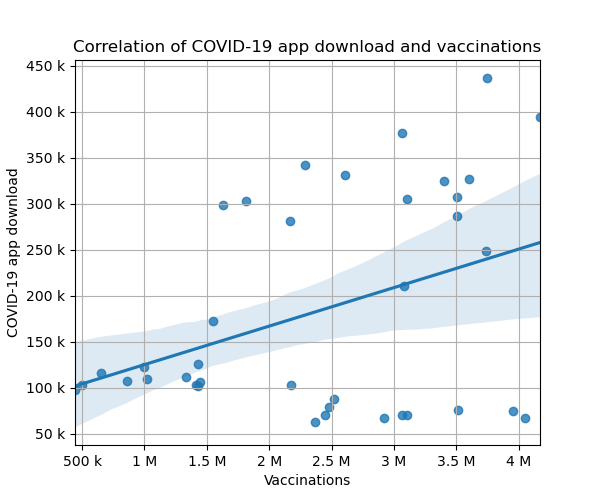

The Pearson Correlation coefficient is  0.38991772584507045 and the P-value is  0.01552171829394403


In [92]:
plt.figure(figsize = (6,5))
sns.regplot(x = result.weekly_vaccinations, y = result.weekly_Covid19_app_download)
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
axes.xaxis.set_major_formatter(ticker.EngFormatter())
plt.grid()
plt.xlabel('Vaccinations')
plt.ylabel('COVID-19 app download')
title = "Correlation of COVID-19 app download and vaccinations"
plt.title(title)
plt.show()
plt.savefig(title, dpi=300, bbox_inches='tight')
pearson_coef, p_value = stats.pearsonr(result.weekly_vaccinations,result.weekly_Covid19_app_download)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

### 2. download and tesing

<IPython.core.display.Javascript object>


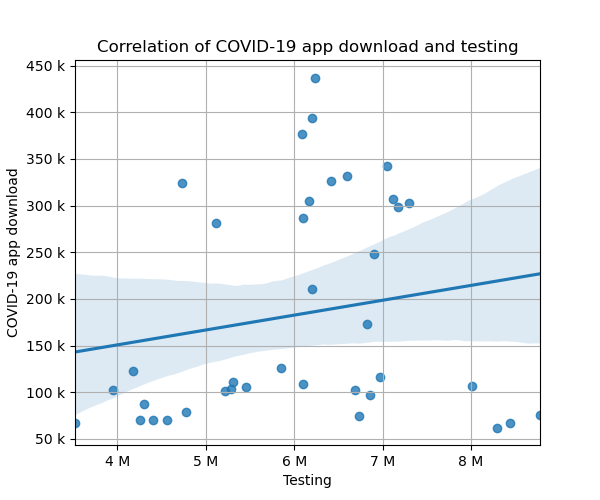

The Pearson Correlation coefficient is  0.17740045153824482 and the P-value is  0.28664118269903616


In [95]:
plt.figure(figsize = (6,5))
sns.regplot(x = result.weekly_testing, y = result.weekly_Covid19_app_download)
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
axes.xaxis.set_major_formatter(ticker.EngFormatter())
plt.grid()
plt.xlabel('Testing')
plt.ylabel('COVID-19 app download')
title = "Correlation of COVID-19 app download and testing"
plt.title(title)
plt.show()
plt.savefig(title, dpi=300, bbox_inches='tight' )
pearson_coef, p_value = stats.pearsonr(result.weekly_testing,result.weekly_Covid19_app_download)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

### 3. download and new cases

<IPython.core.display.Javascript object>


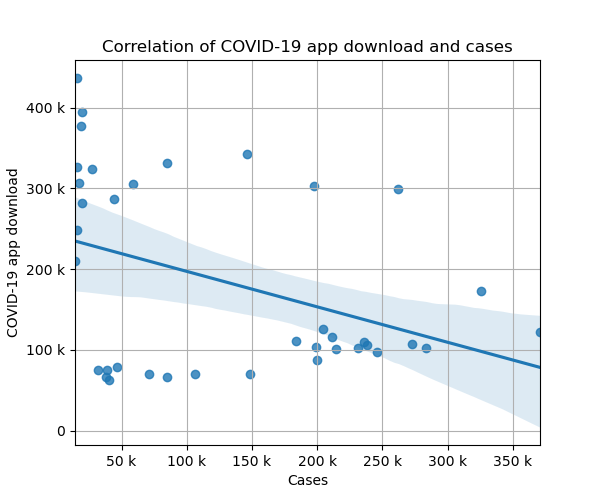

The Pearson Correlation coefficient is  -0.3964966215954028 and the P-value is  0.013721455248474273


In [98]:
plt.figure(figsize = (6,5))
sns.regplot(x = result.weekly_new_cases, y = result.weekly_Covid19_app_download)
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
axes.xaxis.set_major_formatter(ticker.EngFormatter())
plt.grid()
plt.xlabel('Cases')
plt.ylabel('COVID-19 app download')
title = "Correlation of COVID-19 app download and cases"
plt.title(title)
plt.show()
plt.savefig(title, dpi=300, bbox_inches='tight')
pearson_coef, p_value = stats.pearsonr(result.weekly_new_cases,result.weekly_Covid19_app_download)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

### 4. download and deaths

<IPython.core.display.Javascript object>


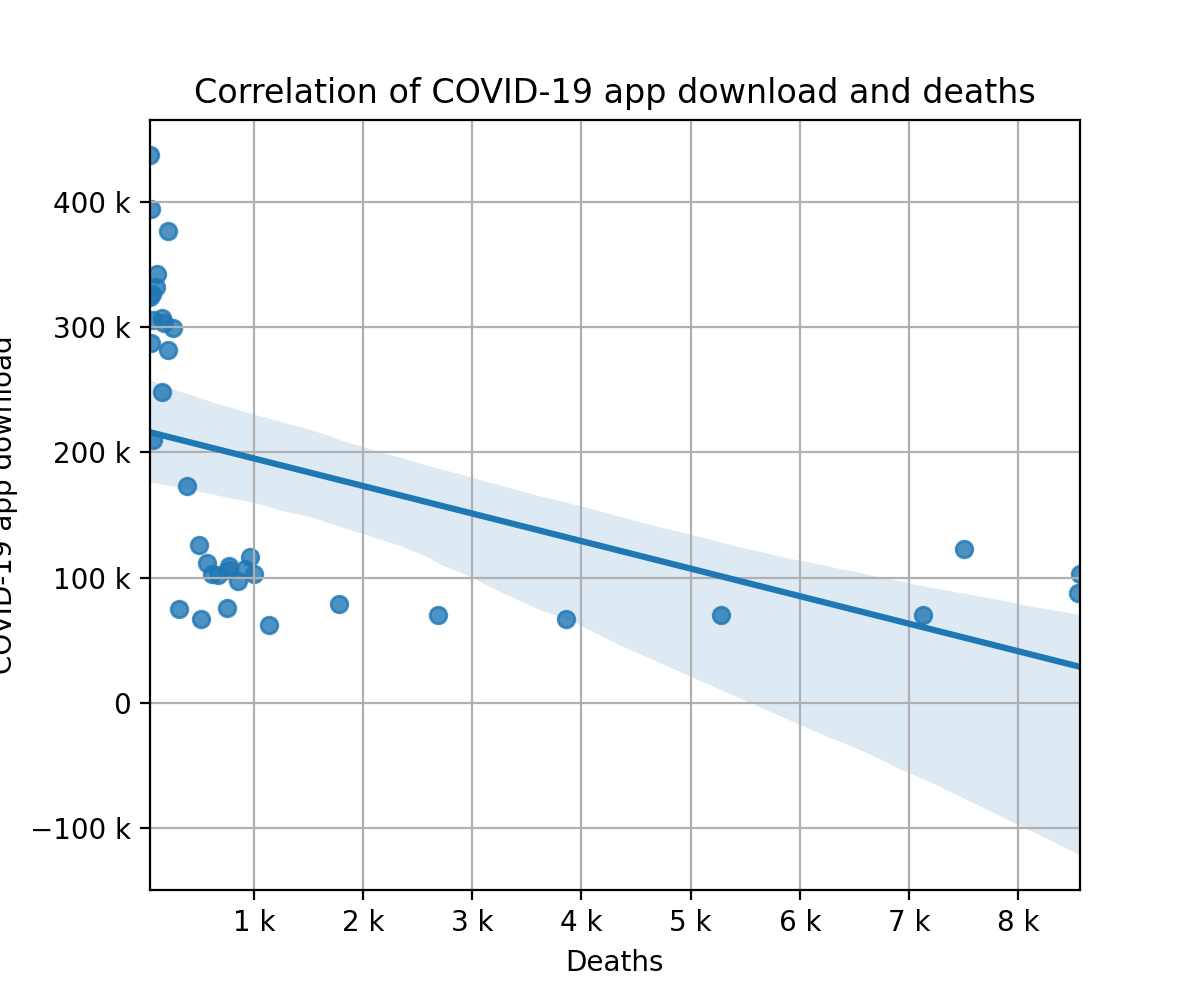

The Pearson Correlation coefficient is  -0.46455840370877666 and the P-value is  0.003299989612497175


In [52]:
plt.figure(figsize = (6,5))
sns.regplot(x = result.weekly_deaths, y = result.weekly_Covid19_app_download)
axes = plt.gca()
axes.yaxis.set_major_formatter(ticker.EngFormatter())
axes.xaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('Deaths')
plt.ylabel('COVID-19 app download')
plt.grid()
title = "Correlation of COVID-19 app download and deaths"
plt.title(title)
plt.show()
plt.savefig(title, dpi=300, bbox_inches='tight')
pearson_coef, p_value = stats.pearsonr(result.weekly_deaths,result.weekly_Covid19_app_download)
print("The Pearson Correlation coefficient is ", pearson_coef, "and the P-value is ", p_value)

## correlation example testing

In [35]:
test_sam_1 = np.array([1,2,3])
test_sam_2 = np.array([1,2,3,4])
b = np.correlate(test_sam_2,test_sam_1, "full")
b

array([ 3,  8, 14, 20, 11,  4])

In [55]:
test_sam_1 = np.array([1,2,3])
test_sam_2 = np.array([1,2,3,4])
b = np.correlate(test_sam_1,test_sam_2,'full')
b

array([ 4, 11, 20, 14,  8,  3])

<IPython.core.display.Javascript object>


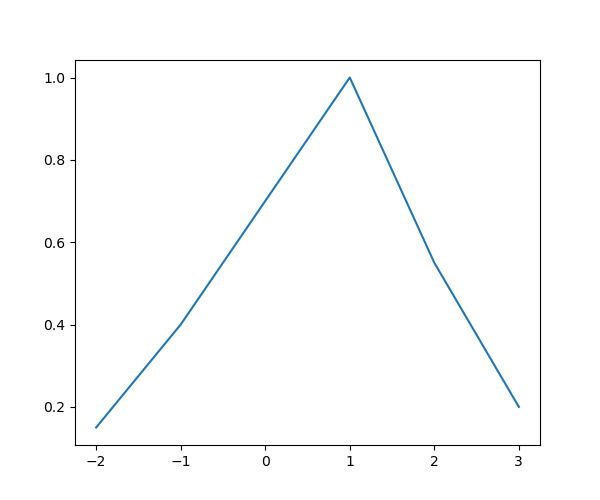

In [65]:
from scipy import signal
corr = signal.correlate(test_sam_2, test_sam_1)
lags = signal.correlation_lags(len(test_sam_2), len(test_sam_1))
corr = corr/np.argmax(corr)
corr
plt.figure(figsize = (6, 5))
plt.plot(lags,corr)
plt.show()

In [64]:
lag = lags[np.argmax(corr)]
lag

0